In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
ac={}
f1={}
pr={}
rc={}
df=pd.read_csv('Diabetes_dataset.csv')
df

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [3]:
from sklearn.preprocessing import StandardScaler
x=df.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [6]:
standardized_data = scaler.transform(x)
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [7]:
x= standardized_data
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred=lr.predict(x_test)
ac['Logistic Regression']=accuracy_score(y_test,y_pred)*100
f1['Logistic Regression']=f1_score( y_test,y_pred)*100
pr['Logistic Regression']=precision_score( y_test,y_pred)*100
rc['Logistic Regression']=recall_score(y_test,y_pred)*100

In [11]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [12]:
y_pred=nb.predict(x_test)
ac['GaussianNB']=accuracy_score(y_test,y_pred)*100
f1['GaussianNB']=f1_score( y_test,y_pred)*100
pr['GaussianNB']=precision_score( y_test,y_pred)*100
rc['GaussianNB']=recall_score(y_test,y_pred)*100

In [13]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

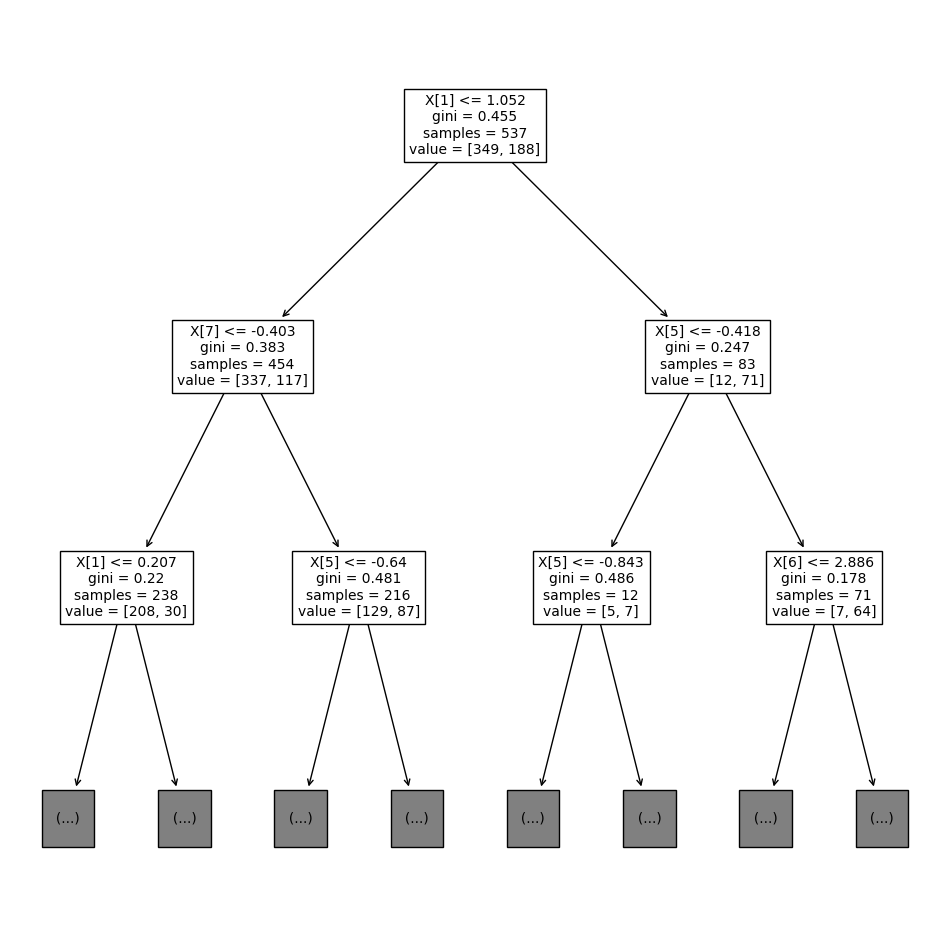

In [14]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(dt, fontsize=10,max_depth=2)
plt.show()

In [15]:
y_pred=dt.predict(x_test)
ac['Decision Tree']=accuracy_score(y_test,y_pred)*100
f1['Decision Tree']=f1_score( y_test,y_pred)*100
pr['Decision Tree']=precision_score( y_test,y_pred)*100
rc['Decision Tree']=recall_score(y_test,y_pred)*100

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
y_pred=knn.predict(x_test)
ac['KNeighborsClassifier']=accuracy_score(y_test,y_pred)*100
f1['KNeighborsClassifier']=f1_score( y_test,y_pred)*100
pr['KNeighborsClassifier']=precision_score( y_test,y_pred)*100
rc['KNeighborsClassifier']=recall_score(y_test,y_pred)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [19]:
y_pred=svc.predict(x_test)
ac['Support vector machine classifier']=accuracy_score(y_test,y_pred)*100
f1['Support vector machine classifier']=f1_score( y_test,y_pred)*100
pr['Support vector machine classifier']=precision_score( y_test,y_pred)*100
rc['Support vector machine classifier']=recall_score(y_test,y_pred)*100

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
y_pred=rf.predict(x_test)
ac['RandomForestClassifier']=accuracy_score(y_test,y_pred)*100
f1['RandomForestClassifier']=f1_score( y_test,y_pred)*100
pr['RandomForestClassifier']=precision_score( y_test,y_pred)*100
rc['RandomForestClassifier']=recall_score(y_test,y_pred)*100

In [22]:
print("Accuracy score of different models :- \n")
for key,val in ac.items():
    print(key,val)

Accuracy score of different models :- 

Logistic Regression 73.59307359307358
GaussianNB 74.45887445887446
Decision Tree 69.26406926406926
KNeighborsClassifier 69.26406926406926
Support vector machine classifier 74.89177489177489
RandomForestClassifier 74.45887445887446


In [23]:
print("F1 score of different models :- \n")
for key,val in f1.items():
    print(key,val)

F1 score of different models :- 

Logistic Regression 62.11180124223602
GaussianNB 64.24242424242424
Decision Tree 58.95953757225433
KNeighborsClassifier 53.59477124183007
Support vector machine classifier 62.33766233766234
RandomForestClassifier 62.42038216560509


In [24]:
print("Precision score of different models :- \n")
for key,val in pr.items():
    print(key,val)

Precision score of different models :- 

Logistic Regression 61.72839506172839
GaussianNB 62.35294117647059
Decision Tree 54.83870967741935
KNeighborsClassifier 56.16438356164384
Support vector machine classifier 64.86486486486487
RandomForestClassifier 63.63636363636363


In [25]:
print("Recall score of different models :- \n")
for key,val in pr.items():
    print(key,val)

Recall score of different models :- 

Logistic Regression 61.72839506172839
GaussianNB 62.35294117647059
Decision Tree 54.83870967741935
KNeighborsClassifier 56.16438356164384
Support vector machine classifier 64.86486486486487
RandomForestClassifier 63.63636363636363
